In [1]:
# Import 3rd-party frameworks.

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import time as tm
import json
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import gc
import requests

In [2]:
from Mike_NB_01 import *

In [3]:
import requests

def call_coincodex(url):
    try:
        response = requests.put(url)
        response.raise_for_status()
        return response
    except requests.exceptions.HTTPError as errh:
        print(errh)
    except requests.exceptions.ConnectionError as errc:
        print(errc)
    except requests.exceptions.Timeout as errt:
        print(errt)
    except requests.exceptions.RequestException as err:
        print(err)
    return None

In [4]:
history_format = "https://coincodex.com/api/coincodex/get_coin_history/{}/{}/{}/{}"

https://coincodex.com/page/api/

In [5]:
symbol = "ETH"
start_date = "2022-05-23"
end_date = "2022-05-23"
samples = 288       # the number of 5-minute candles in a day.
history_url = history_format.format(symbol, start_date, end_date, samples)
response = call_coincodex(history_url)
if response != None:
    history = response.json()[symbol]
    print(len(history), history)

print(datetime.fromtimestamp(history[0][0]), datetime.fromtimestamp(history[-1][0]))

286 [[1653264300, 2052.1821959686363, 18745833472, 248076263465.5225], [1653264600, 2068.243762295425, 18934001664, 250017851969.49677], [1653264900, 2069.810881420256, 19009890304, 250207291804.64258], [1653265200, 2070.2986960130515, 19090790400, 250266260848.2696], [1653265500, 2064.586802382395, 19144026112, 249575783544.65137], [1653265800, 2049.969234813925, 19092127744, 247808751577.18552], [1653266100, 2057.7823756873663, 19213359104, 248755384654.6654], [1653266400, 2049.688, 19163881472, 247776894625.088], [1653266700, 2057.7873, 19275364352, 248755979931.0648], [1653267000, 2057.5277, 19266535424, 248724598139.3752], [1653267300, 2058.4901, 16270617600, 248840938032.7576], [1653267600, 2052.8636, 19270184960, 248160777589.99362], [1653267900, 2055.0484, 19270273024, 248424887522.5184], [1653268200, 2047.1682652111465, 19296051200, 247472296041.66412], [1653268500, 2050.3515793841243, 19396167680, 247857111535.72784], [1653268800, 2050.7141422560803, 19440119808, 247900940012

In [6]:
s = datetime(2023, 3, 22, 3, 45, 6)
print(datetime(s.year, s.month, s.day))
print(str(s.year%100), str(s.month).zfill(2), str(s.day).zfill(2))
start_date = "-".join([str(s.year%100), str(s.month).zfill(2), str(s.day).zfill(2)])
print(start_date)
e = datetime(2023, 3, 22, 4, 5, 6)
assert s <= e
end_date = "-".join([str(e.year%100), str(e.month).zfill(2), str(e.day).zfill(2)])
print(end_date)
td = e-s
print(td, td.days)
samples = int( (td.days + 1) * 1440 / 5 + 0.1)    # 1440 minutes per day, 5 minutes per cc candle.
print(samples)




2023-03-22 00:00:00
23 03 22
23-03-22
23-03-22
0:20:00 0
288


In [7]:
coincodex_candle_sec = 300
history_format = "https://coincodex.com/api/coincodex/get_coin_history/{}/{}/{}/{}"

In [8]:
cc_candle_sec = 300
def get_cc_history_numpy(symbol, start, end):
    result = None
    assert start <= end
    start -= timedelta(minutes=cc_candle_sec)
    end += timedelta(seconds=cc_candle_sec)
    start_date = "-".join([str(start.year%100), str(start.month).zfill(2), str(start.day).zfill(2)])
    end_date = "-".join([str(end.year%100), str(end.month).zfill(2), str(end.day).zfill(2)])
    delta = end - start
    samples = int( (delta.days + 1) * 86400 / cc_candle_sec + 0.1)    # 86400 seconds per day, cc_candle_sec seconds per cc candle.
    history_url = history_format.format(symbol, start_date, end_date, samples)
    try:
        response = requests.put(history_url)
        response.raise_for_status()
        try:
            result = response.json()[symbol]
            result = np.array(result)
        except:
            pass
    except requests.exceptions.HTTPError as errh:
        print(errh)
    except requests.exceptions.ConnectionError as errc:
        print(errc)
    except requests.exceptions.Timeout as errt:
        print(errt)
    except requests.exceptions.RequestException as err:
        print(err)

    if result is not None:
        try:
            assert result.shape[0] > 0
            assert result[0, 0] % (cc_candle_sec) == 0
            if result.shape[0] > 1:    # Check if timestamps are correct.
                delta = result[1:, 0] - result[:-1, 0]
                assert np.min(delta) == np.max(delta)
        except:
            result = None
    return result

In [9]:
coincodex_candle_sec = 300
history_format = "https://coincodex.com/api/coincodex/get_coin_history/{}/{}/{}/{}"

def get_coincodex_history_numpy(symbol, start, end):
    result = None
    assert start <= end
    start -= timedelta(seconds=coincodex_candle_sec)
    end += timedelta(seconds=coincodex_candle_sec)
    start_date = "-".join([str(start.year%100), str(start.month).zfill(2), str(start.day).zfill(2)])
    end_date = "-".join([str(end.year%100), str(end.month).zfill(2), str(end.day).zfill(2)])
    delta = end - start
    samples = round( (delta.days + 1) * 86400 / coincodex_candle_sec + 0.1)    # 86400 seconds per day, coincodex_candle_sec seconds per coincodex candle.
    history_url = history_format.format(symbol, start_date, end_date, samples)
    try:
        response = requests.put(history_url)
        response.raise_for_status()
        try:
            result = response.json()[symbol]
            result = np.array(result)
        except:
            pass
    except requests.exceptions.HTTPError as errh:
        print(errh)
    except requests.exceptions.ConnectionError as errc:
        print(errc)
    except requests.exceptions.Timeout as errt:
        print(errt)
    except requests.exceptions.RequestException as err:
        print(err)

    if result is not None:
        try:
            assert result.shape[0] > 0
            assert result[0, 0] % (coincodex_candle_sec) == 0
            if result.shape[0] > 1:    # Check if timestamps are correct.
                delta = result[1:, 0] - result[:-1, 0]
                assert np.min(delta) == np.max(delta)
        except:
            result = None
    return result

In [10]:
symbol = "ETH"
start = datetime(2023, 3, 22, 3, 45, 6)
end = start + timedelta(days=1, minutes=0, microseconds=3000)
history = get_coincodex_history_numpy(symbol, start, end)
print(history.shape, history)

(575, 4) [[1.67944350e+09 1.80475132e+03 3.98657167e+10 2.20854396e+11]
 [1.67944380e+09 1.80379721e+03 3.93769411e+10 2.20737638e+11]
 [1.67944410e+09 1.80356224e+03 3.90692946e+10 2.20708883e+11]
 ...
 [1.67961510e+09 1.81982990e+03 1.04262468e+11 2.22699620e+11]
 [1.67961540e+09 1.81834780e+03 1.04038449e+11 2.22518250e+11]
 [1.67961570e+09 1.81891820e+03 1.04135393e+11 2.22588052e+11]]


In [11]:
def extract_from_coincodex_history(history, start, end, interval_mili):

    start_sec = round(datetime.timestamp(start)*1000/interval_mili) * round(interval_mili/1000)
    end_sec = round(datetime.timestamp(end)*1000/interval_mili) * round(interval_mili/1000)

    adds = int(coincodex_candle_sec/(interval_mili/1000)) - 1
    if adds > 0:
        history = history[ np.logical_and( start_sec - adds * interval_mili/1000 <= history[:, 0], history[:, 0] <= end_sec + adds * interval_mili/1000 ) ]
        for t in range(history.shape[0]-1, 0, -1):
            h = history[t]
            if t > 0: h_ = history[t-1]
            hs = [h.copy() for _ in range(adds)] # Not [h for _ in range(adds)]   # Not [h] x add
            # print("ts", h[0],  interval_mili/1000)
            for i in range(adds):
                hs[i][0] = h[0] - (adds-i) * interval_mili/1000
                if t > 0:
                    hs[i][1] = ( h_[1] * (adds-i) + h[1] * (i+1) ) / (adds+1)   # price is interploated.
            hs = np.array(hs)
            # print(history.shape, hs.shape)
            history = np.insert(history, t, hs, axis=0)

    history = history[ np.logical_and( start_sec <= history[:,0], history[:,0] <= end_sec) ]
    try:
        assert history[0, 0] == start_sec
        assert end_sec == history[-1, 0]
        assert history[0, 0] % (interval_mili/1000) == 0
        if history.shape[0] > 1:
            delta = history[1:,0] - history[:-1,0]
            assert delta[0] == interval_mili/1000
            assert np.min(delta) == np.max(delta)
        assert history.shape[0] == round((end_sec - start_sec)/(interval_mili/1000)) + 1
    except:
        history = None

    return history

(867, 4)


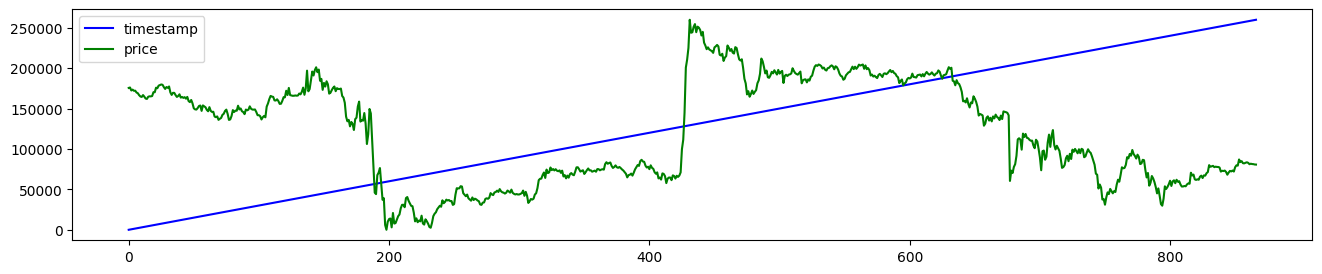

In [12]:
symbol = "ETH"
start = datetime(2023, 3, 22, 3, 23, 6)
end = start + timedelta(days=3, minutes=10, milliseconds=3000)
history = get_coincodex_history_numpy(symbol, start, end)

if history is not None:
    interval_mili = 300000
    history = extract_from_coincodex_history(history, start, end, interval_mili)
    print(history.shape)

    series = [[history[:, 0], "timestamp", "b"], [history[:, 1], "price", "g"]]
    PoltNormalized("", series)

In [13]:

ccInterval_sec = 300
ccHistoryFormat = "https://coincodex.com/api/coincodex/get_coin_history/{}/{}/{}/{}"

def fetch_coincodex_history_numpy(symbol, start, end, clientInterval_sec):
    result = None
    assert start <= end
    start_sec = round(datetime.timestamp(start)/clientInterval_sec) * clientInterval_sec
    end_sec = round(datetime.timestamp(end)/clientInterval_sec) * clientInterval_sec
    start_clientCandle = round(start_sec / clientInterval_sec)
    end_clientCandle = round(end_sec / clientInterval_sec)
    start_cc = datetime.fromtimestamp( (int(clientInterval_sec * start_clientCandle / ccInterval_sec ) + 0 ) * ccInterval_sec )
    end_cc = datetime.fromtimestamp( (int(clientInterval_sec  * end_clientCandle / ccInterval_sec) + 1 ) * ccInterval_sec)

    start_date = "-".join([str(start_cc.year%100), str(start_cc.month).zfill(2), str(start_cc.day).zfill(2)])
    end_date = "-".join([str(end_cc.year%100), str(end_cc.month).zfill(2), str(end_cc.day).zfill(2)])
    delta = end - start
    samples = int( (delta.days + 1) * 86400 / ccInterval_sec + 0.1)    # 86400 seconds per day, ccInterval_sec seconds per cc candle.
    history_url = ccHistoryFormat.format(symbol, start_date, end_date, samples)
    try:
        response = requests.put(history_url)
        response.raise_for_status()
        try:
            result = response.json()[symbol]
            result = np.array(result)
        except:
            pass
    except requests.exceptions.HTTPError as errh:
        print(errh)
    except requests.exceptions.ConnectionError as errc:
        print(errc)
    except requests.exceptions.Timeout as errt:
        print(errt)
    except requests.exceptions.RequestException as err:
        print(err)

    if result is not None:
        try:
            assert result.shape[0] > 0
            assert round(result[0, 0]) % (ccInterval_sec) == 0
            if result.shape[0] > 1:    # Check if timestamps are correct.
                delta = result[1:, 0] - result[:-1, 0]
                assert np.min(delta) == np.max(delta)
        except:
            result = None
    
    history = None
    if result is not None:
        left_to_start = int(clientInterval_sec * start_clientCandle / ccInterval_sec)
        offset = np.argmax( np.round(result[:, 0]) == left_to_start * ccInterval_sec )
        assert offset is not None and round(result[offset, 0]) == left_to_start * ccInterval_sec
        history = np.zeros( (end_clientCandle - start_clientCandle + 1, 4), dtype=float )
        for i in range(start_clientCandle, end_clientCandle + 1, 1):
            left_to_i = int(clientInterval_sec * i / ccInterval_sec)
            id_left =  left_to_i - left_to_start + offset
            client_sec = i * clientInterval_sec
            cc_left_sec = left_to_i * ccInterval_sec
            cc_right_sec = cc_left_sec + ccInterval_sec
            assert result[id_left, 0] <= client_sec
            assert client_sec <= result[id_left + 1, 0]
            assert round(result[id_left, 0]) == cc_left_sec
            assert round(result[id_left+1, 0]) == cc_right_sec

            history[i-start_clientCandle, 0] = client_sec
            history[i-start_clientCandle, 1:4] = ( (cc_right_sec - client_sec) * result[id_left, 1:4] + (client_sec - cc_left_sec) * result[id_left+1, 1:4] ) / ccInterval_sec

        try:
            assert history[0, 0] == start_sec
            assert end_sec == history[-1, 0]
            assert history[0, 0] % clientInterval_sec == 0
            if history.shape[0] > 1:
                delta = history[1:,0] - history[:-1,0]
                assert delta[0] == clientInterval_sec
                assert np.min(delta) == np.max(delta)
            assert history.shape[0] == end_clientCandle - start_clientCandle + 1
        except:
            history = None

    return history



(31, 4)


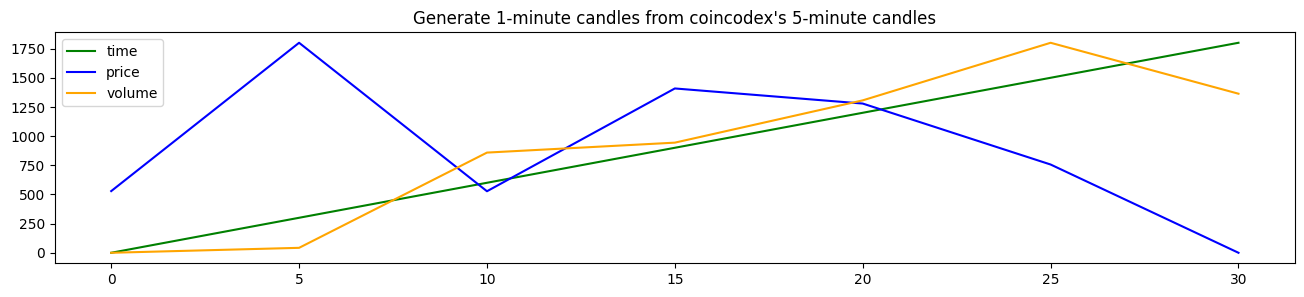

In [14]:
symbol = "BTC"
start = datetime(2023, 3, 22, 3, 25, 6)
end = start + timedelta(days=0, minutes=30, milliseconds=3000)

clientInterval_sec = 60
history = fetch_coincodex_history_numpy(symbol, start, end, clientInterval_sec)
print(history.shape)

series = [ [history[:, 0], "time", "g"], [history[:, 1], "price", "b"], [history[:, 2], "volume", "orange"] ]
PoltNormalized( "Generate 1-minute candles from coincodex's 5-minute candles", series)

(11, 4)


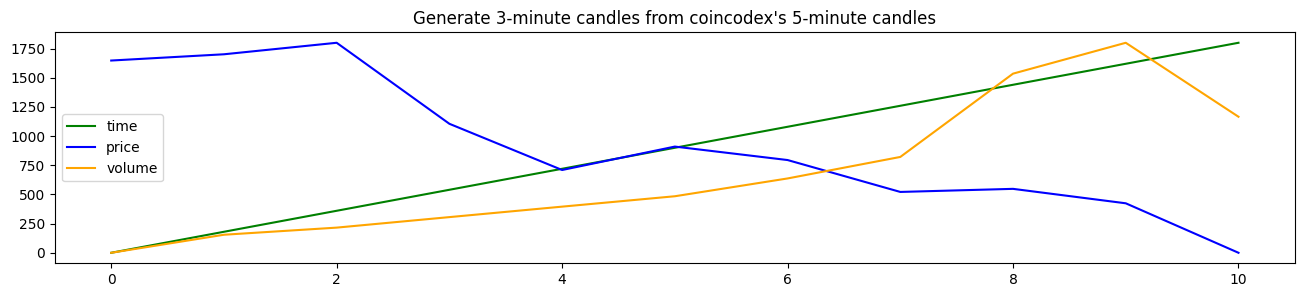

In [15]:
symbol = "ETH"
start = datetime(2023, 3, 22, 3, 25, 6)
end = start + timedelta(days=0, minutes=30, milliseconds=3000)

clientInterval_sec = 180
history = fetch_coincodex_history_numpy(symbol, start, end, clientInterval_sec)
print(history.shape)

series = [ [history[:, 0], "time", "g"], [history[:, 1], "price", "b"], [history[:, 2], "volume", "orange"] ]
PoltNormalized( "Generate 3-minute candles from coincodex's 5-minute candles", series)

(7, 4)


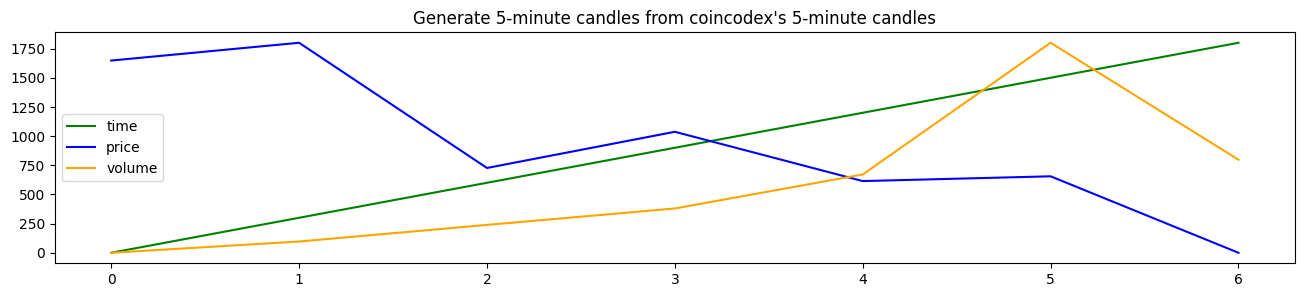

In [16]:
symbol = "ETH"
start = datetime(2023, 3, 22, 3, 25, 6)
end = start + timedelta(days=0, minutes=30, milliseconds=3000)

clientInterval_sec = 300
history = fetch_coincodex_history_numpy(symbol, start, end, clientInterval_sec)
print(history.shape)

series = [ [history[:, 0], "time", "g"], [history[:, 1], "price", "b"], [history[:, 2], "volume", "orange"] ]
PoltNormalized( "Generate 5-minute candles from coincodex's 5-minute candles", series)